In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

C:\Users\Singgihher\Anaconda3\envs\py36\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# DATA PREPARATION

## FIle Merging

In [8]:
# path = "D:/RAFM Project Data Science/Sample Output Pipeline 15 Sept"
# files = [file for file in os.listdir(path) if file.endswith('.csv')] # Ignore hidden files
# files


['Diamond-3G_BRN0100.2020091507492500CF6095_a2p_1.dat.csv',
 'Diamond-3G_BRN0100.2020091508192700CF6096_a2p_1.dat.csv',
 'Diamond-3G_BRN0100.2020091510495600CF6101_a2p_1.dat.csv',
 'Diamond-3G_BRN0100.2020091511500900CF6103_a2p_1.dat.csv',
 'Diamond-3G_BRN0100.2020091512201700CF6104_a2p_1.dat.csv',
 'Diamond-3G_BRN0100.2020091513503300CF6107_a2p_1.dat.csv',
 'Diamond-3G_BRN0100.2020091515510900CF6111_a2p_1.dat.csv',
 'Diamond-3G_BRN0100.2020091517213100CF6114_a2p_1.dat.csv',
 'Diamond-3G_BRN0100.2020091519220300CF6118_a2p_1.dat.csv',
 'Diamond-3G_BRN0100.2020091520222100CF6120_a2p_1.dat.csv',
 'Diamond-3G_BRN0101.2020091504100300CF9261_a2p_1.dat.csv',
 'Diamond-3G_BRN0101.2020091505100300CF9262_a2p_1.dat.csv',
 'Diamond-3G_BRN0101.2020091506405800CF9264_a2p_1.dat.csv',
 'Diamond-3G_BRN0101.2020091508161300CF9267_a2p_1.dat.csv',
 'Diamond-3G_BRN0101.2020091510463300CF9272_a2p_1.dat.csv',
 'Diamond-3G_BRN0101.2020091511464000CF9274_a2p_1.dat.csv',
 'Diamond-3G_BRN0101.2020091512164200CF9

In [10]:
# all_months_data = pd.DataFrame()

# for file in files:
#     current_data = pd.read_csv(path+"/"+file)
#     all_months_data = pd.concat([all_months_data, current_data])
    
# all_months_data.to_csv("Diamond-3G_BRN_merge.csv", index=False)

C:\Users\Singgihher\Anaconda3\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [38]:
df = pd.read_csv('Diamond-3G_BRN_merge.csv')

In [3]:
df.head()

,phoneNumber,imei,recordType,Service_Type,netType,callTypeINT,Cell_Site_ID,duration,ageInNetwork,latitude,...,r_cnttrxiSint_cnttrxiS_p,r_cnttrxiS_cnttrxoS_p,r_cnttrxoS_cnttrxoiS_p,cnt_dIMEI_oi_VS_p,cnt_dCell_oi_VS_p,wh_flag_p,bl_IMEI_p,bl_Position_p,bl_Bnum_p,cnt_trx_sms_registration_p
0,+default,-1111,Incoming,SMS,Offnet,International,510106553565535,1,0,0,...,0.238876,427.0,0.0,18.0,28.0,0.0,1.0,0.0,0.0,0.0
1,+default,-1111,Incoming,SMS,Onnet,Others,510106553565535,1,0,0,...,0.483412,211.0,0.0,8.0,13.0,0.0,1.0,0.0,0.0,0.0
2,+default,-1111,Incoming,SMS,Onnet,Others,510106553565535,1,0,0,...,0.481132,212.0,0.0,8.0,13.0,0.0,1.0,0.0,0.0,0.0
3,+default,-1111,Incoming,SMS,Onnet,Others,510106553565535,1,0,0,...,0.478873,213.0,0.0,8.0,13.0,0.0,1.0,0.0,0.0,0.0
4,+default,-1111,Incoming,SMS,Offnet,International,510106553565535,1,0,0,...,0.481308,214.0,0.0,8.0,13.0,0.0,1.0,0.0,0.0,0.0


## Data Cleansing

In [39]:
df.drop(['imei','recordType','Service_Type','netType','callTypeINT','Cell_Site_ID','duration','latitude','longitude','otherpartynumber'], axis='columns', inplace=True)

In [40]:
df = df[~(df['phoneNumber']=='+default')]

In [63]:
#df = df[df['phoneNumber'].str[0:3]=='+62']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7513585 entries, 37 to 7518514
Data columns (total 33 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   phoneNumber                 object 
 1   ageInNetwork                int64  
 2   timeStamp                   object 
 3   cnt_trx_oi_VS_p             float64
 4   cnt_trx_oi_S_p              float64
 5   r_cnttrxoiS_cnttrxoiVS_p    float64
 6   cnt_trx_o_VS_p              float64
 7   cnt_trx_o_S_p               float64
 8   cnt_dcalled_o_S_p           float64
 9   cnt_trx_o_SOn_p             float64
 10  cnt_trx_o_SInt_p            float64
 11  r_cnttrxoS_per_cnttrxoVS_p  float64
 12  r_cntdcalledoS_cnttrxoS_p   float64
 13  r_cnttrxoSOn_cnttrxoS_p     float64
 14  r_cnttrxoSint_cnttrxoS_p    float64
 15  cnt_trx_i_VS_p              float64
 16  cnt_trx_i_S_p               float64
 17  cnt_dcaller_i_S_p           float64
 18  cnt_trx_i_SOn_p             float64
 19  cnt_trx_i_SInt_p    

In [10]:
df.shape

(7513585, 33)

## Data Labeling

In [41]:
df_fraud1 = pd.read_csv('A2P_Fraud_15September2020.txt', sep='|',header=None)

In [42]:
df_fraud1 = df_fraud1.rename(columns={1:'MSISDN'})

In [43]:
df_fraud1['MSISDN'] = df_fraud1['MSISDN'].apply(lambda x: "+"+ str(x))

In [44]:
df_fraud1['MSISDN'] = df_fraud1['MSISDN'].astype(str).apply(lambda x: x.strip())

In [45]:
df_fraud2 = pd.read_csv('MSISDN_A2P_Fraud_15September_RAFM.txt',dtype={'Reference Value':str})

In [46]:
df_fraud2['Reference Value'] = df_fraud2['Reference Value'].astype(str).apply(lambda x: x.strip())

In [47]:
msisdn_fraud = pd.concat([df_fraud1['MSISDN'],df_fraud2['Reference Value']],axis='rows')

In [48]:
df['timeStamp'] = df['timeStamp'].astype(str).apply(lambda x: x.strip())

In [49]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'] , format='%Y/%m/%d %H:%M:%S')

In [50]:
df = df.sort_values(by=['phoneNumber','timeStamp'], ascending=[True,True])

In [51]:
df['first_og'] = df.groupby('phoneNumber')['timeStamp'].transform('first')

In [52]:
df['first_og_12'] = df['first_og']+pd.to_timedelta(6, unit='H')

In [53]:
df['label'] = 0

In [54]:
df.loc[df['phoneNumber'].isin(msisdn_fraud),'label']= 1

In [55]:
df.loc[df['timeStamp'] < df['first_og_12'],'label'] = 0

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7513585 entries, 2705511 to 390631
Data columns (total 36 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   phoneNumber                 object        
 1   ageInNetwork                int64         
 2   timeStamp                   datetime64[ns]
 3   cnt_trx_oi_VS_p             float64       
 4   cnt_trx_oi_S_p              float64       
 5   r_cnttrxoiS_cnttrxoiVS_p    float64       
 6   cnt_trx_o_VS_p              float64       
 7   cnt_trx_o_S_p               float64       
 8   cnt_dcalled_o_S_p           float64       
 9   cnt_trx_o_SOn_p             float64       
 10  cnt_trx_o_SInt_p            float64       
 11  r_cnttrxoS_per_cnttrxoVS_p  float64       
 12  r_cntdcalledoS_cnttrxoS_p   float64       
 13  r_cnttrxoSOn_cnttrxoS_p     float64       
 14  r_cnttrxoSint_cnttrxoS_p    float64       
 15  cnt_trx_i_VS_p              float64       
 16  cnt_trx_i_S_p

# DATA EXPLORATION

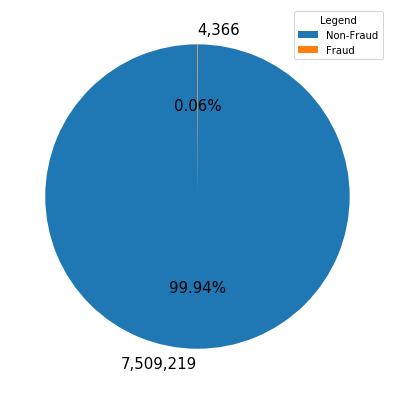

In [55]:
flag_taker_Pie=df['label'].value_counts().reset_index(name='count').rename(columns={'index':'label'})
flag_taker_Pie.plot(kind='pie', y = 'count', autopct='%1.2f%%', startangle=90, shadow=False, labels=['{:,}'.format(x) for x in flag_taker_Pie['count']], legend = True, fontsize=15, figsize=(7,7))
#plt.title("Combo Package Taker : 1=Yes , 0= No")
plt.legend(title='Legend', loc='upper right', labels=['Non-Fraud', 'Fraud'])
plt.xlabel('')
plt.ylabel('')
plt.show()

In [22]:
# Stratified Random Sampling 
size = 4366        # sample size per strata/group
fn = lambda x: x.sample(size, random_state=123, replace=False)
df_sample = df.groupby('label', as_index=False).apply(fn)

In [23]:
# Show Data Profile
def show_data_profile(df):
    Data_dict = pd.DataFrame(df.dtypes)
    Data_dict = Data_dict.rename(columns={0: 'Data_Type'})
    Data_dict['Missing'] = df.isnull().sum()
    Data_dict['Missing_Pct'] = round((df.isnull().sum()/df.count())*100, 2)
    Data_dict['Infinite'] = df[df.isin([np.inf,-np.inf])].count()
    Data_dict['Unique'] = df.nunique()
    Data_dict['Count'] = df.count()
    Data_dict = Data_dict.reset_index()
    desc_num = df.describe().T[['mean', 'std', 'min','25%', '50%', '75%', 'max']]
    desc_num = desc_num.reset_index()
    Data_dict = pd.merge(Data_dict, desc_num, how='left', on=['index'])
    if df.select_dtypes(include='O').shape[1] > 0:
        desc_obj = df.describe(include='object').T[['top','freq']]
        desc_obj = desc_obj.reset_index()
        Data_dict = pd.merge(Data_dict, desc_obj, how='left', on=['index'])
        Data_dict = Data_dict.fillna('-')#.sort_values(by=['Data_Type', 'Missing_Pct'], ascending=[True, False])
        Data_dict = Data_dict.reset_index(drop=True).rename(columns={'index':'Columns'})
    return Data_dict

In [25]:
show_data_profile(df_sample[df_sample['label']==0])

,Columns,Data_Type,Missing,Missing_Pct,Infinite,Unique,Count,mean,std,min,25%,50%,75%,max,top,freq
0,phoneNumber,object,0,0.0,0,4145,4366,-,-,-,-,-,-,-,+6282212525983,13
1,imei,int64,0,0.0,0,3983,4366,5.53105e+14,2.74056e+14,-1111,3.54857e+14,3.58481e+14,8.65096e+14,9.91806e+14,-,-
2,recordType,object,0,0.0,0,2,4366,-,-,-,-,-,-,-,Incoming,2963
3,Service_Type,object,0,0.0,0,2,4366,-,-,-,-,-,-,-,SMS,3927
4,netType,object,0,0.0,0,2,4366,-,-,-,-,-,-,-,Onnet,2488
5,callTypeINT,object,0,0.0,0,2,4366,-,-,-,-,-,-,-,Others,2747
6,Cell_Site_ID,int64,0,0.0,0,3416,4366,5.10101e+14,1.50461e+09,5.101e+14,5.101e+14,5.101e+14,5.101e+14,5.10107e+14,-,-
7,duration,int64,0,0.0,0,209,4366,24.6807,155.799,0,1,1,1,1800,-,-
8,ageInNetwork,int64,0,0.0,0,5,4366,1.48191,8.23704,0,0,0,0,48,-,-
9,latitude,int64,0,0.0,0,1,4366,0,0,0,0,0,0,0,-,-


In [26]:
show_data_profile(df_sample[df_sample['label']==1])

,Columns,Data_Type,Missing,Missing_Pct,Infinite,Unique,Count,mean,std,min,25%,50%,75%,max,top,freq
0,phoneNumber,object,0,0.0,0,43,4366,-,-,-,-,-,-,-,+6282399622783,931
1,imei,int64,0,0.0,0,61,4366,5.17128e+14,3.68456e+14,-1111,-1111,3.57273e+14,8.6616e+14,9.53255e+14,-,-
2,recordType,object,0,0.0,0,2,4366,-,-,-,-,-,-,-,Outgoing,3780
3,Service_Type,object,0,0.0,0,1,4366,-,-,-,-,-,-,-,SMS,4366
4,netType,object,0,0.0,0,2,4366,-,-,-,-,-,-,-,Onnet,3460
5,callTypeINT,object,0,0.0,0,2,4366,-,-,-,-,-,-,-,Others,4289
6,Cell_Site_ID,int64,0,0.0,0,53,4366,5.101e+14,5.81736e+08,5.101e+14,5.101e+14,5.101e+14,5.101e+14,5.10107e+14,-,-
7,duration,int64,0,0.0,0,1,4366,1,0,1,1,1,1,1,-,-
8,ageInNetwork,int64,0,0.0,0,5,4366,0.0952817,2.09873,0,0,0,0,48,-,-
9,latitude,int64,0,0.0,0,1,4366,0,0,0,0,0,0,0,-,-


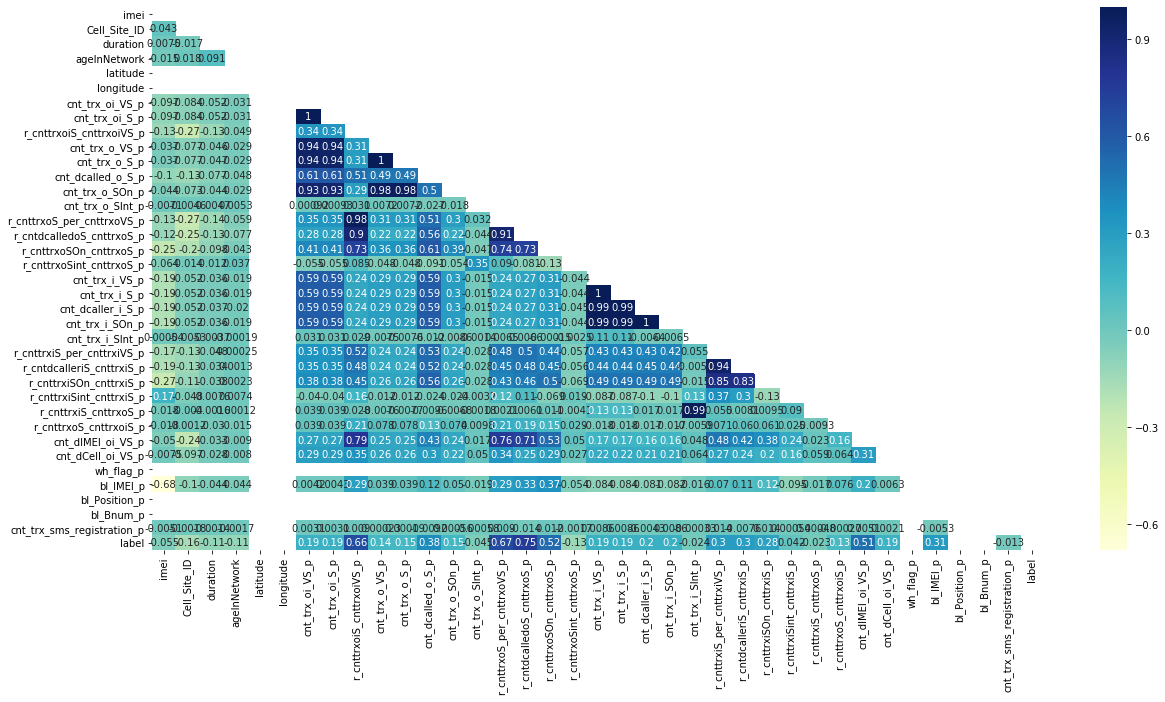

In [27]:
corr = df_sample.corr()
mask = np.triu(corr)
#mask = np.tril(corr)
fig = plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, fmt='.2g',cmap='YlGnBu',mask=mask)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [52]:
corr = df_sample.corr()
corr_label  =corr[['label']]
corr_label['label_abs'] = corr_label['label'].abs()

C:\Users\Singgihher\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [54]:
corr_label.sort_values(by='label_abs', ascending=False)

,label,label_abs
label,1.000000,1.000000
r_cntdcalledoS_cnttrxoS_p,0.746378,0.746378
r_cnttrxoS_per_cnttrxoVS_p,0.672533,0.672533
r_cnttrxoiS_cnttrxoiVS_p,0.661655,0.661655
r_cnttrxoSOn_cnttrxoS_p,0.523657,0.523657
cnt_dIMEI_oi_VS_p,0.506223,0.506223
cnt_dcalled_o_S_p,0.382885,0.382885
bl_IMEI_p,0.311461,0.311461
r_cntdcalleriS_cnttrxiS_p,0.302987,0.302987
r_cnttrxiS_per_cnttrxiVS_p,0.300490,0.300490


In [28]:
df_sample_melt = df_sample.melt(id_vars=['label'])
df_sample_melt.head(3)

,label,variable,value
0,0,phoneNumber,+6281223331991
1,0,phoneNumber,+6281315662685
2,0,phoneNumber,+6285245252583


In [29]:
import seaborn as sns

In [32]:
cols = ['cnt_trx_oi_VS_p',
'cnt_trx_oi_S_p',
'r_cnttrxoiS_cnttrxoiVS_p',
'cnt_trx_o_VS_p',
'cnt_trx_o_S_p',
'cnt_dcalled_o_S_p',
'cnt_trx_o_SOn_p',
'cnt_trx_o_SInt_p',
'r_cnttrxoS_per_cnttrxoVS_p',
'r_cntdcalledoS_cnttrxoS_p',
'r_cnttrxoSOn_cnttrxoS_p',
'r_cnttrxoSint_cnttrxoS_p',
'cnt_trx_i_VS_p',
'cnt_trx_i_S_p',
'cnt_dcaller_i_S_p',
'cnt_trx_i_SOn_p',
'cnt_trx_i_SInt_p',
'r_cnttrxiS_per_cnttrxiVS_p',
'r_cntdcalleriS_cnttrxiS_p',
'r_cnttrxiSOn_cnttrxiS_p',
'r_cnttrxiSint_cnttrxiS_p',
'r_cnttrxiS_cnttrxoS_p',
'r_cnttrxoS_cnttrxoiS_p',
'cnt_dIMEI_oi_VS_p',
'cnt_dCell_oi_VS_p',
'wh_flag_p',
'bl_IMEI_p',
'bl_Position_p',
'bl_Bnum_p',
'cnt_trx_sms_registration_p']

C:\Users\Singgihher\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


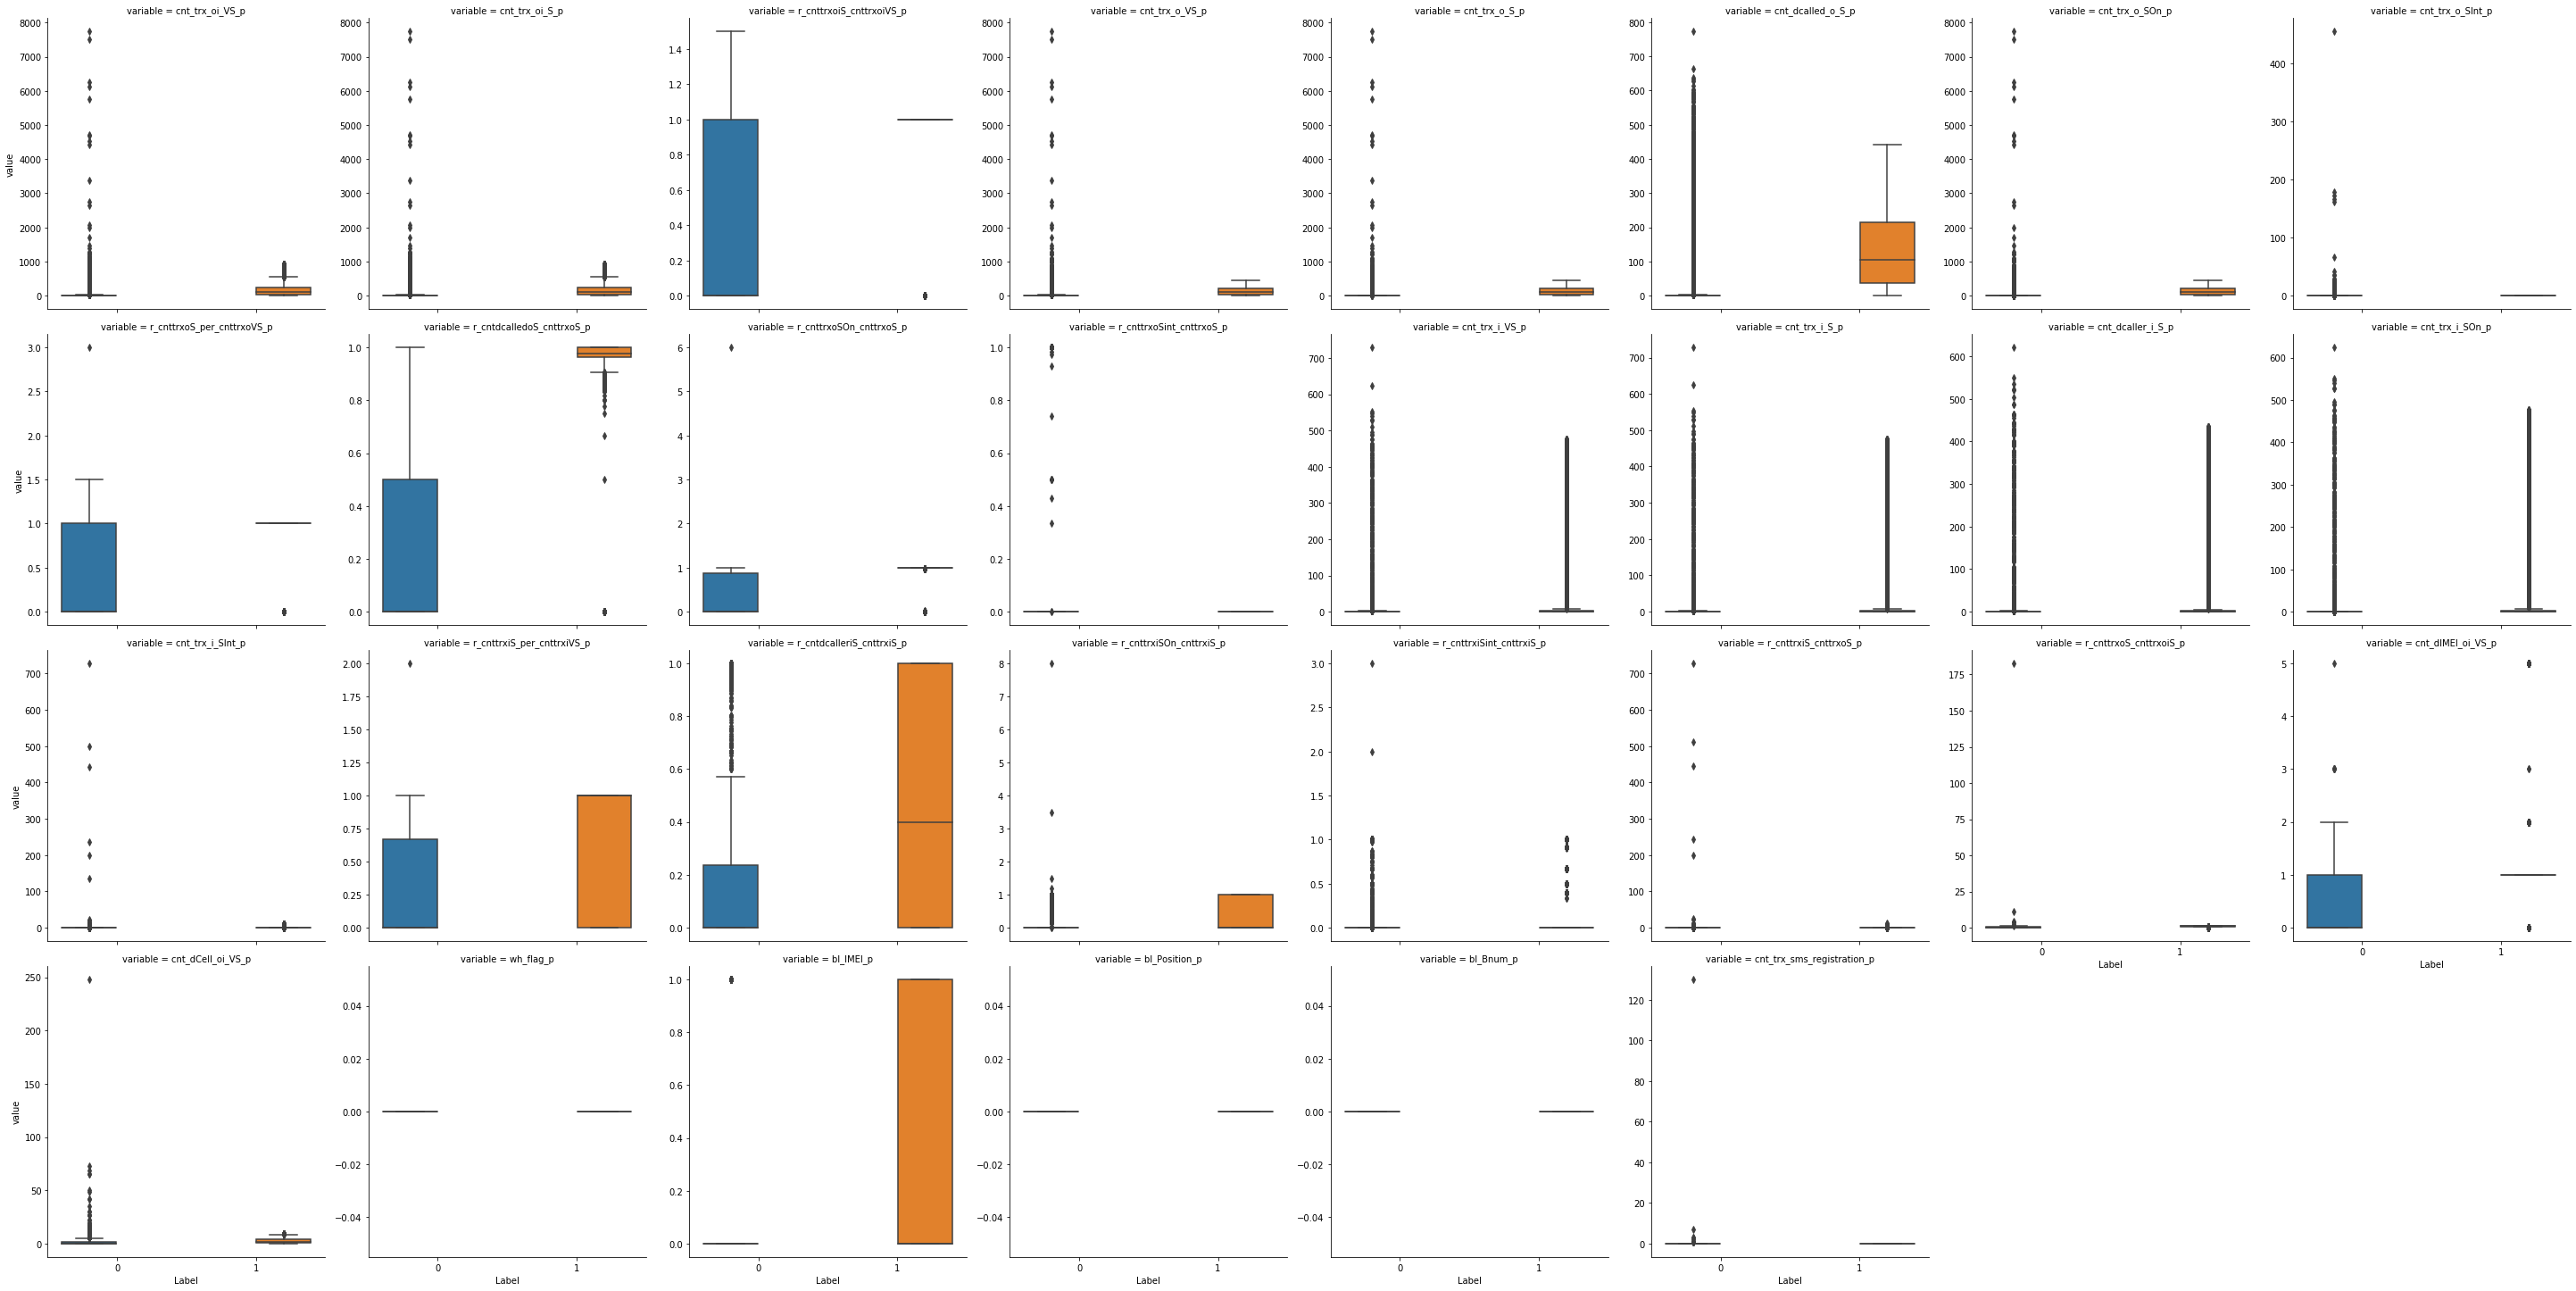

In [45]:
g = sns.FacetGrid(df_sample_melt[df_sample_melt['variable'].isin(cols)],height=5, aspect=1, col='variable',sharey=False, col_wrap=8)
g = g.map_dataframe(sns.boxplot, x="label", y="value",hue='label', palette=sns.color_palette()) 
g.set_xlabels("Label")
g.set_ylabels("value")
g.fig.show()

In [26]:
df['label'].value_counts()

0    7509219
1       4366
Name: label, dtype: int64

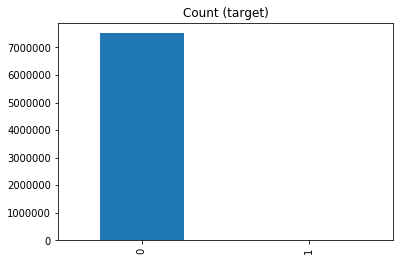

In [27]:
target_count = df['label'].value_counts()
target_count.plot(kind='bar', title='Count (target)');

# DATA MODELLING

In [56]:
y = df['label']
X = df.drop(['phoneNumber','timeStamp','first_og','first_og_12','label'],axis='columns')

In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7513585 entries, 2705511 to 390631
Data columns (total 31 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   ageInNetwork                int64  
 1   cnt_trx_oi_VS_p             float64
 2   cnt_trx_oi_S_p              float64
 3   r_cnttrxoiS_cnttrxoiVS_p    float64
 4   cnt_trx_o_VS_p              float64
 5   cnt_trx_o_S_p               float64
 6   cnt_dcalled_o_S_p           float64
 7   cnt_trx_o_SOn_p             float64
 8   cnt_trx_o_SInt_p            float64
 9   r_cnttrxoS_per_cnttrxoVS_p  float64
 10  r_cntdcalledoS_cnttrxoS_p   float64
 11  r_cnttrxoSOn_cnttrxoS_p     float64
 12  r_cnttrxoSint_cnttrxoS_p    float64
 13  cnt_trx_i_VS_p              float64
 14  cnt_trx_i_S_p               float64
 15  cnt_dcaller_i_S_p           float64
 16  cnt_trx_i_SOn_p             float64
 17  cnt_trx_i_SInt_p            float64
 18  r_cnttrxiS_per_cnttrxiVS_p  float64
 19  r_cntdcalleriS_c

## Train Test Split

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=9988)

In [64]:
y_train.value_counts()

0    5256453
1       3056
Name: label, dtype: int64

## TPOT

In [ ]:
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('A2P_TPOT_pipeline.py')

## Resampling

In [88]:
# # #Handling Data Imbalance
# # Option : Using under-sampling
# from imblearn.under_sampling import RandomUnderSampler
# #rus = RandomUnderSampler(sampling_strategy='majority')
# rus = RandomUnderSampler(sampling_strategy={0: 3056000,1: 3056})
# X_sm,y_sm = rus.fit_sample(X_train,y_train)
# X_train = pd.DataFrame(X_sm,columns = X.columns)
# y_train = y_sm


# from imblearn.under_sampling import NearMiss
# rus = NearMiss(sampling_strategy={0: 6112,1: 3056})
# #rus = RandomUnderSampler(sampling_strategy={0: 6112,1: 3056})
# X_sm,y_sm = rus.fit_sample(X_train,y_train)
# X_train = pd.DataFrame(X_sm,columns = X.columns)
# y_train = y_sm

# from imblearn.under_sampling import TomekLinks
# rus = TomekLinks(sampling_strategy='majority')
# #TomekLinks(return_indices=True, ratio='majority')
# X_sm,y_sm = rus.fit_sample(X_train,y_train)
# X_train = pd.DataFrame(X_sm,columns = X.columns)
# y_train = y_sm


# from imblearn.under_sampling import ClusterCentroids
# rus = ClusterCentroids(sampling_strategy='majority')
# X_sm,y_sm = rus.fit_sample(X_train,y_train)
# X_train = pd.DataFrame(X_sm,columns = X.columns)
# y_train = y_sm


# # Option : Using oversampling
# from imblearn.over_sampling import SMOTE
# smote = SMOTE('not majority') #not majority -> Semua class dibuat jumlahnya sama dengan class terbanyak
# X_sm, y_sm = smote.fit_sample(X_train,y_train)
# X_train = pd.DataFrame(X_sm,columns = X_train.columns)
# y_train = y_sm



# # Option : Using oversampling
# from imblearn.combine import SMOTETomek
# smote = SMOTETomek(sampling_strategy='auto')
# X_sm, y_sm = smote.fit_sample(X_train,y_train)
# X_train = pd.DataFrame(X_sm,columns = X_train.columns)
# y_train = y_sm


# from imblearn.over_sampling import ADASYN
# smote = ADASYN(sampling_strategy='not majority')
# X_sm, y_sm = smote.fit_sample(X_train,y_train)
# X_train = pd.DataFrame(X_sm,columns = X_train.columns)
# y_train = y_sm


# # Option : Using class_weight
# from sklearn.utils import class_weight
# my_class_weight = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
# w_array = np.ones(y_train.shape[0], dtype = 'float')
# for i, val in enumerate(y_train):
#     w_array[i] = my_class_weight[val-1]
    
    


In [43]:
y_train.value_counts()

0    6112
1    6024
Name: label, dtype: int64

## Algorithm Selection

In [23]:
def modeling(x,y):
    #############################################
    
    # STRATIFIED K FOLD
    from sklearn.model_selection import StratifiedKFold
    #Linear Model
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    
    #Ensemble
    from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
    
    #Cross Val Score
    from sklearn.model_selection import cross_val_score
    
    #XGBOOST
    from xgboost import XGBClassifier
    
    #################################################
    
    #linear Model
    logreg = LogisticRegression(random_state = 123)
    
    # Tree
    dt = DecisionTreeClassifier(random_state=123)
    #Ensemble
    randomforest = RandomForestClassifier()
    ada = AdaBoostClassifier()
    gdc = GradientBoostingClassifier()
    bagging = BaggingClassifier()
    xgb= XGBClassifier()
    
    classifiers = [logreg,dt,randomforest,bagging,ada,gdc, xgb]
    result=[]
    for clf, label in zip(classifiers, 
                      ['Logistic Regression',
                       'Decision Tree',
                       'Random Forest',
                       'Bagging',
                       'AdaBoost',
                       'GradBoost',
                      'XGBoost']):

        scores_auc = cross_val_score(clf, x, y, cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=123), scoring='roc_auc')
        scores_precision = cross_val_score(clf, x, y, cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=123), scoring='precision')
        scores_recall = cross_val_score(clf, x, y, cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=123), scoring='recall')
        scores_f1 = cross_val_score(clf, x, y, cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=123), scoring='f1_macro')
        print("AUC       : %0.4f (+/- %0.4f) [%s]" % (scores_auc.mean(), scores_auc.std(), label))
        print("Precision : %0.4f (+/- %0.4f) [%s]" % (scores_precision.mean(), scores_precision.std(), label))
        print("Recall    : %0.4f (+/- %0.4f) [%s]" % (scores_recall.mean(), scores_recall.std(), label))
        print("F1        : %0.4f (+/- %0.4f) [%s]" % (scores_f1.mean(), scores_f1.std(), label))

        auc="%0.4f (+/- %0.4f)" % (scores_auc.mean(), scores_auc.std())
        precision="%0.4f (+/- %0.4f)" % (scores_precision.mean(), scores_precision.std())
        recall="%0.4f (+/- %0.4f)" % (scores_recall.mean(), scores_recall.std())
        f1="%0.4f (+/- %0.4f)" % (scores_f1.mean(), scores_f1.std())

        result.append([label,auc,precision,recall,f1])

    df_result = pd.DataFrame(result,columns=['Classifier','AUC Score','Precision','Recall','F1 Score'])
    return df_result
        
df_score = modeling(X_test,y_test)

C:\Users\Singgihher\Anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Singgihher\Anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

AUC       : 0.6340 (+/- 0.1909) [Logistic Regression]
Precision : 0.0000 (+/- 0.0000) [Logistic Regression]
Recall    : 0.0000 (+/- 0.0000) [Logistic Regression]
F1        : 0.4998 (+/- 0.0000) [Logistic Regression]
AUC       : 0.6729 (+/- 0.0201) [Decision Tree]
Precision : 0.6903 (+/- 0.0430) [Decision Tree]
Recall    : 0.5290 (+/- 0.0210) [Decision Tree]
F1        : 0.7991 (+/- 0.0125) [Decision Tree]
AUC       : 0.8459 (+/- 0.0055) [Random Forest]
Precision : 0.7908 (+/- 0.0281) [Random Forest]
Recall    : 0.3954 (+/- 0.0112) [Random Forest]
F1        : 0.7641 (+/- 0.0066) [Random Forest]
AUC       : 0.7835 (+/- 0.0108) [Bagging]
Precision : 0.7805 (+/- 0.0158) [Bagging]
Recall    : 0.4863 (+/- 0.0274) [Bagging]
F1        : 0.7960 (+/- 0.0110) [Bagging]
AUC       : 0.9729 (+/- 0.0035) [AdaBoost]
Precision : 0.6667 (+/- 0.4714) [AdaBoost]
Recall    : 0.0015 (+/- 0.0011) [AdaBoost]
F1        : 0.5014 (+/- 0.0011) [AdaBoost]
AUC       : 0.9778 (+/- 0.0025) [GradBoost]
Precision : 0.90

C:\Users\Singgihher\Anaconda3\envs\py36\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AUC       : 0.9762 (+/- 0.0015) [XGBoost]
Precision : 0.0000 (+/- 0.0000) [XGBoost]
Recall    : 0.0000 (+/- 0.0000) [XGBoost]
F1        : 0.4999 (+/- 0.0000) [XGBoost]


In [24]:
df_score

,Classifier,AUC Score,Precision,Recall,F1 Score
0,Logistic Regression,0.6340 (+/- 0.1909),0.0000 (+/- 0.0000),0.0000 (+/- 0.0000),0.4998 (+/- 0.0000)
1,Decision Tree,0.6729 (+/- 0.0201),0.6903 (+/- 0.0430),0.5290 (+/- 0.0210),0.7991 (+/- 0.0125)
2,Random Forest,0.8459 (+/- 0.0055),0.7908 (+/- 0.0281),0.3954 (+/- 0.0112),0.7641 (+/- 0.0066)
3,Bagging,0.7835 (+/- 0.0108),0.7805 (+/- 0.0158),0.4863 (+/- 0.0274),0.7960 (+/- 0.0110)
4,AdaBoost,0.9729 (+/- 0.0035),0.6667 (+/- 0.4714),0.0015 (+/- 0.0011),0.5014 (+/- 0.0011)
5,GradBoost,0.9778 (+/- 0.0025),0.9081 (+/- 0.0528),0.0794 (+/- 0.0168),0.5725 (+/- 0.0145)
6,XGBoost,0.9762 (+/- 0.0015),0.0000 (+/- 0.0000),0.0000 (+/- 0.0000),0.4999 (+/- 0.0000)


## Hyperopt

In [49]:
import hyperopt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials,space_eval

In [50]:
space={ 'max_depth': hp.choice("max_depth",range(1, 10)),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': X_train.shape[1]
    }


# space = {
#     'max_depth' : hp.choice('max_depth', range(5, 30, 1)),
#     'learning_rate' : hp.quniform('learning_rate', 0.01, 0.5, 0.01),
#     'n_estimators' : hp.choice('n_estimators', range(20, 205, 5)),
#     'gamma' : hp.quniform('gamma', 0, 0.50, 0.01),
#     'min_child_weight' : hp.quniform('min_child_weight', 1, 10, 1),
#     'subsample' : hp.quniform('subsample', 0.1, 1, 0.01),
#     'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1.0, 0.01)}

In [51]:
# Classifier:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
#xgb= XGBClassifier()

def hyperparameter_tuning(space):    
    clf=XGBClassifier(**space)
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False,sample_weight=w_array)

    pred = clf.predict_proba(X_test)[:,1]
    pred_labels = np.rint(pred)
    #auc = roc_auc_score(y_test, pred)
    prfs = precision_recall_fscore_support(y_test, pred_labels,average='macro')
    auc = prfs[0]

    loss = 1 - auc
    print("LOSS=%0.7f, AUC=%0.7f" % (loss,auc))
    #change the metric if you like
    return {'loss': loss, 'status': STATUS_OK }

In [52]:
trials = Trials()
best = fmin(fn=hyperparameter_tuning,
            space=space,
            algo=tpe.suggest,
            max_evals=20,
            trials=trials)

LOSS=0.4938105, AUC=0.5061895                                                                                          
LOSS=0.4932745, AUC=0.5067255                                                                                          
LOSS=0.4939336, AUC=0.5060664                                                                                          
LOSS=0.4943484, AUC=0.5056516                                                                                          
LOSS=0.4941850, AUC=0.5058150                                                                                          
LOSS=0.4942634, AUC=0.5057366                                                                                          
LOSS=0.4928100, AUC=0.5071900                                                                                          
LOSS=0.4944802, AUC=0.5055198                                                                                          
LOSS=0.4973767, AUC=0.5026233           

In [36]:
best

{'colsample_bytree': 0.9379615521285364,
 'gamma': 7.4349656225613705,
 'max_depth': 3,
 'min_child_weight': 1.0,
 'reg_alpha': 118.0,
 'reg_lambda': 0.3999540473013198}

In [37]:
trials.best_trial["result"]

{'loss': 0.4980881651615442, 'status': 'ok'}

## Model Fitting

In [85]:
# Model fitting
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train,y_train,eval_metric='auc', verbose=False, eval_set=[( X_train, y_train), ( X_test, y_test)], early_stopping_rounds=10,
        #sample_weight=w_array #used if class_eight imbalance handling applied 
        )

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [58]:
# Model fitting
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier()
model.fit(X_train,y_train,
        sample_weight=w_array
         )

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [124]:
# Model fitting
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train
         #,sample_weight=w_array
         )

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [125]:
#Save encoder to pickle
import pickle
filename = 'A2P_model_DT.pkl'
pickle.dump(model, open(filename, 'wb'))

In [58]:
from sklearn.externals import joblib
model = joblib.load("A2P_model_DT.pkl")

## Model Characteristic

xgboost/bagging/dt

In [165]:
# Feature Important
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances=feature_importances.reset_index().rename(columns={'index':'features'})
feature_importances#.head(10)

,features,importance
0,r_cntdcalledoS_cnttrxoS_p,1.628289e-01
1,cnt_dCell_oi_VS_p,1.321929e-01
2,cnt_dcalled_o_S_p,1.081690e-01
3,r_cnttrxiS_cnttrxoS_p,9.737234e-02
4,r_cntdcalleriS_cnttrxiS_p,9.551039e-02
5,cnt_trx_o_SOn_p,4.170426e-02
6,cnt_dIMEI_oi_VS_p,3.977272e-02
7,cnt_trx_i_SOn_p,3.824856e-02
8,r_cnttrxoS_cnttrxoiS_p,3.629679e-02
9,cnt_trx_o_VS_p,3.584959e-02


dt

In [132]:
#Save model structure to text
from sklearn.tree.export import export_graphviz
from io import StringIO

out = StringIO()
out = export_graphviz(model, out_file='tree.dot')

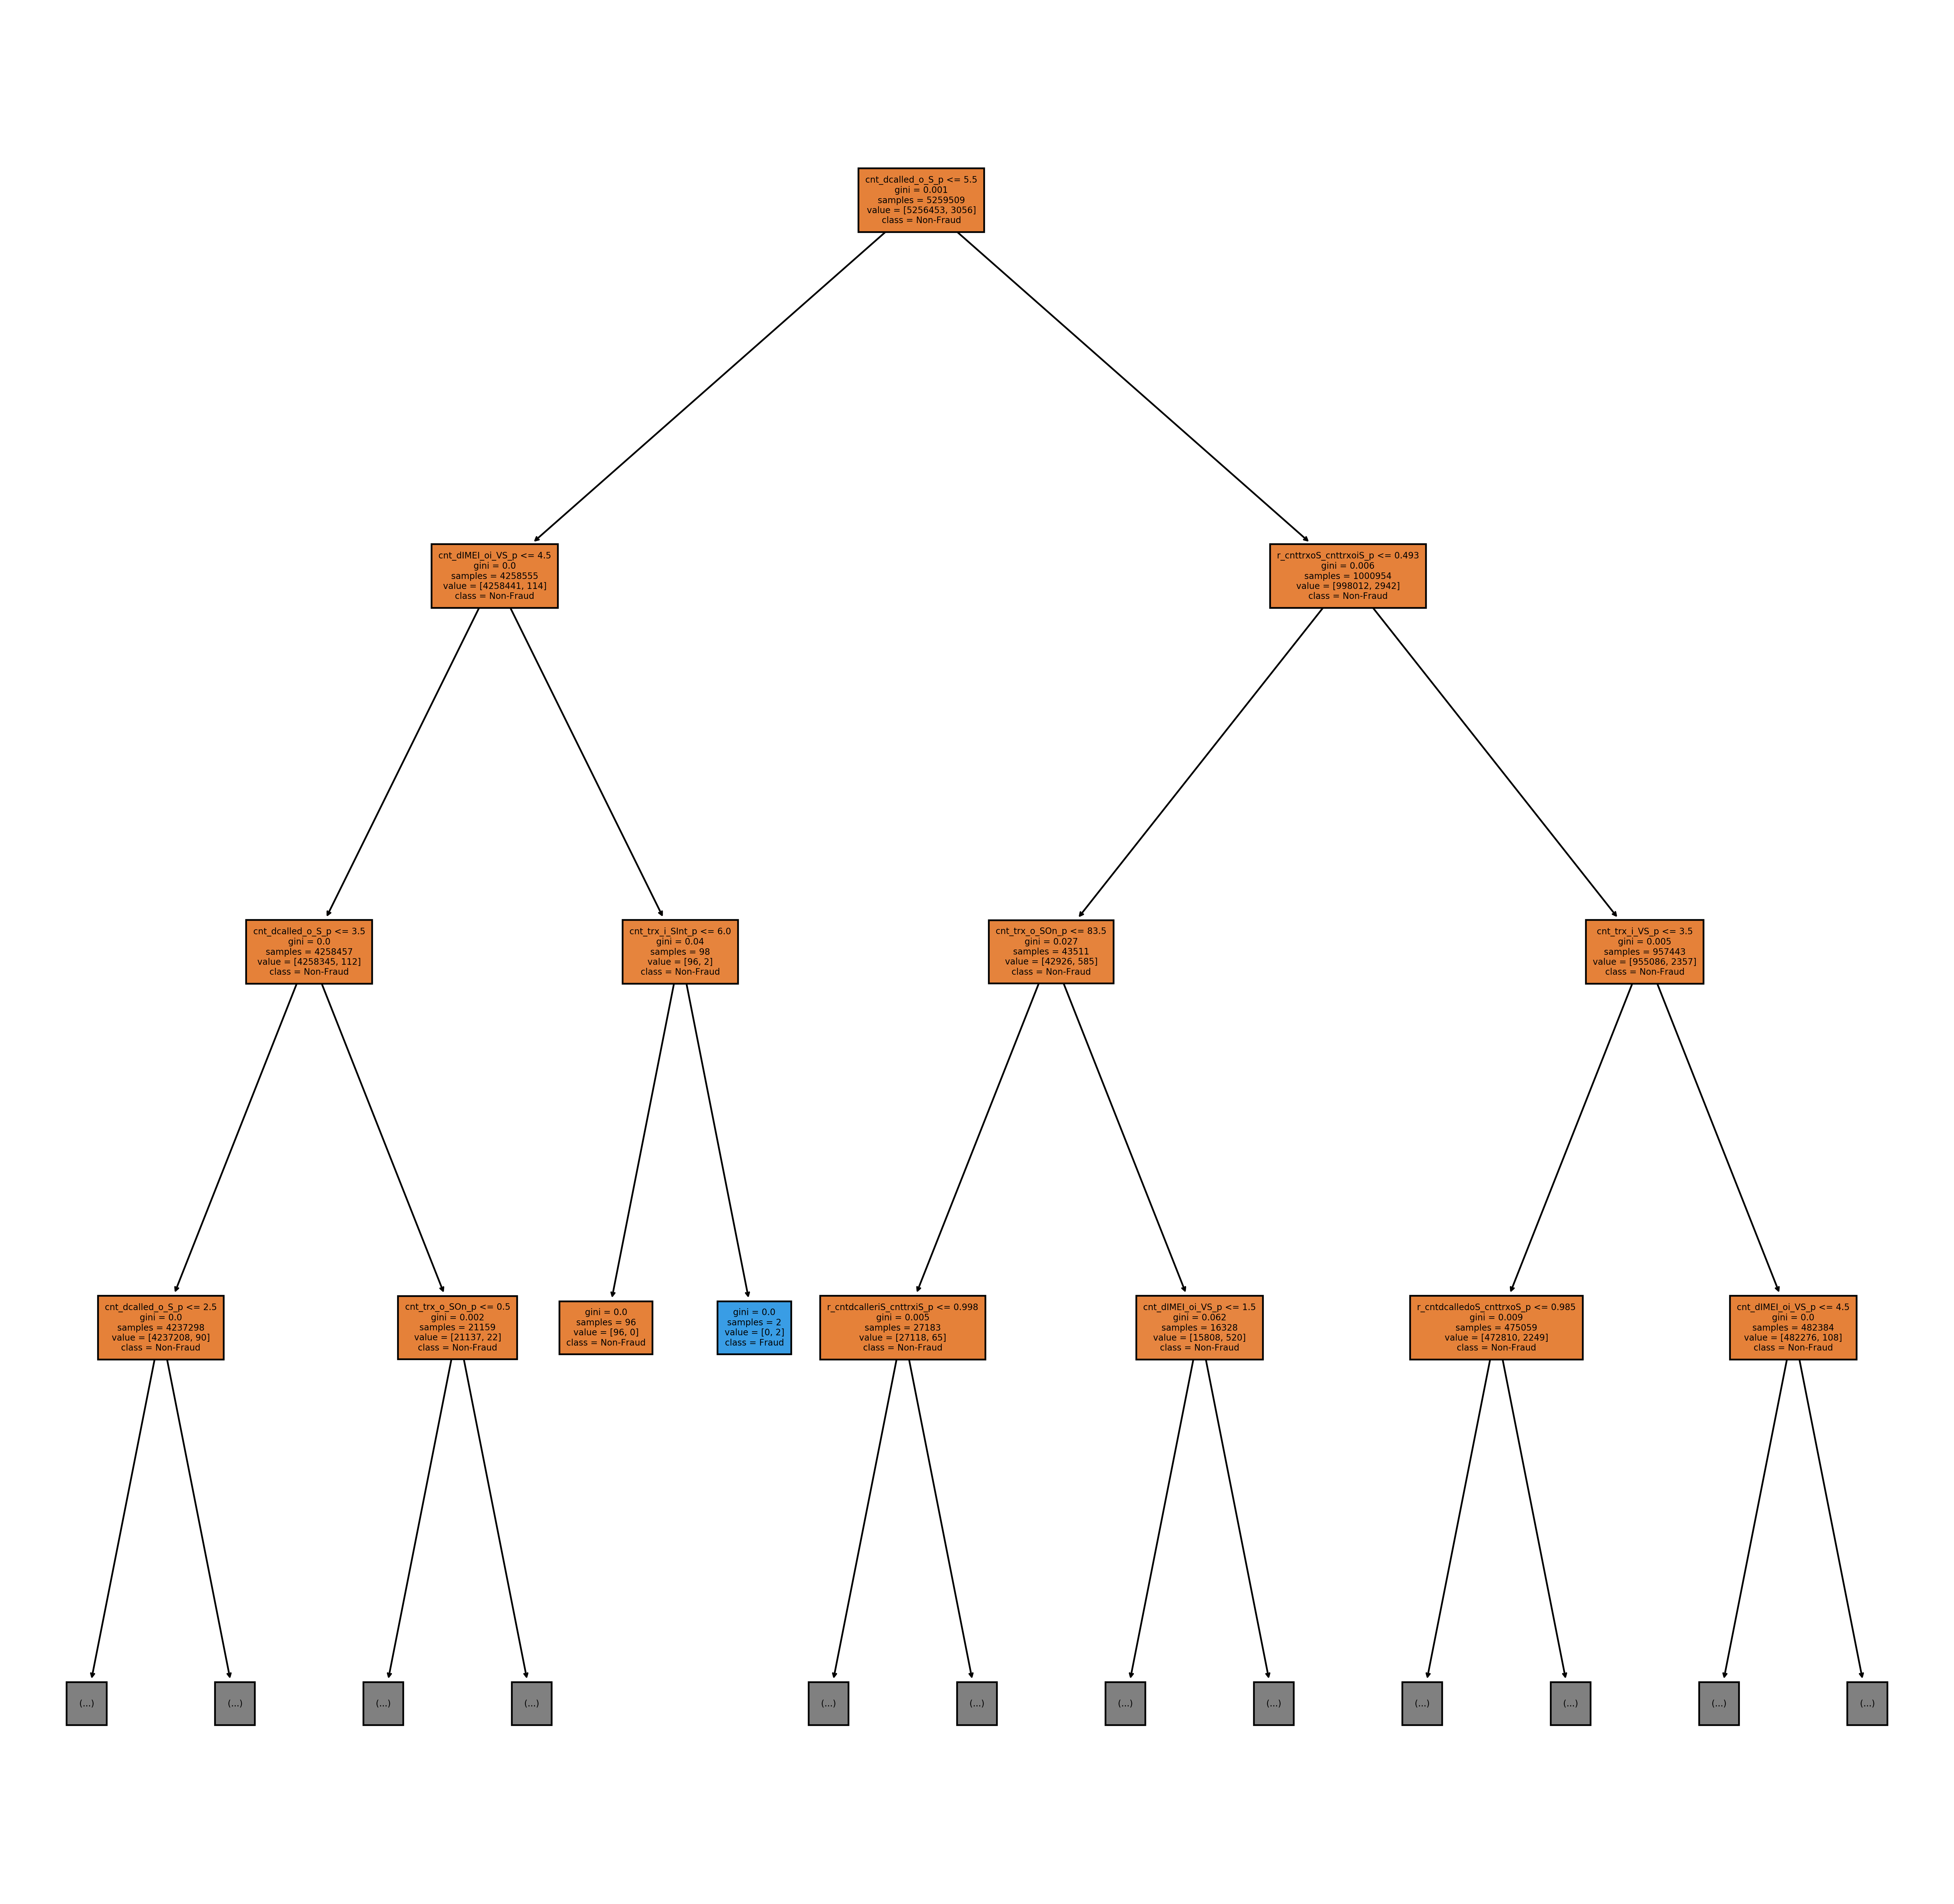

In [159]:
# Save model structure to image
from sklearn import tree
fn=X.columns
cn=['Non-Fraud', 'Fraud']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20), dpi=400)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True,
               max_depth=3,
               fontsize=5
               #fontsize=15
              );
fig.savefig('A2P_DT_Graph.png')

C:\Users\Singgihher\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


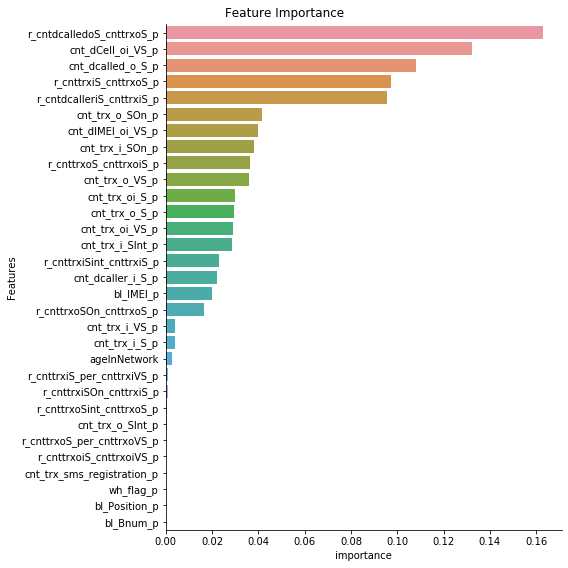

In [160]:
g = sns.catplot(data=feature_importances,x='importance',y='features',kind='bar',height=8, aspect=1,legend=False)
g.fig.subplots_adjust(top=0.95)
g.set_ylabels("Features")
g.fig.suptitle("Feature Importance")
g.fig.show()

In [161]:
import shap
# load JS visualization code to notebook
shap.initjs()
X_shap=X_train.copy()
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_shap)
# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [ ]:
shap.summary_plot(shap_values, X_shap, plot_type='dot')

# EVALUATION

## X_test

In [59]:
# Predict X_test
y_pred = model.predict(X_test)
y_proba_pred = model.predict_proba(X_test)[:,1]

In [60]:
#confusion_matrix
from sklearn.metrics import confusion_matrix
df_confmat = pd.DataFrame(confusion_matrix(y_test, y_pred))
df_confmat.index.name = 'True'
df_confmat.columns.name = 'Predicted'
df_confmat

Predicted,0,1
True,,
0,2252618,148
1,553,757


In [28]:
result = pd.DataFrame()
thresholds = [0.2,0.3,0.4,0.5,0.6,0.7,0.8]
for threshold in thresholds:
  y_proba_pred_thres = [1. if y_cont > threshold  else 0. for y_cont in y_proba_pred]
  df_confmat = pd.DataFrame(confusion_matrix(y_test, y_proba_pred_thres))
  columns=[(threshold,0),(threshold,1)]
  df_confmat.columns = pd.MultiIndex.from_tuples(columns)
  df_confmat.columns.names = ['Threshold', 'Predicted']
  result = pd.concat([result.reset_index(drop=True),df_confmat.reset_index(drop=True)],axis='columns')

result.index.name = 'True'
result

Threshold      0.2             0.3             0.4             0.5         \
Predicted        0      1        0      1        0      1        0      1   
True                                                                        
0          2161419  91347  2197300  55466  2208592  44174  2215637  37129   
1               42   1268       65   1245       95   1215      113   1197   

Threshold      0.6             0.7             0.8        
Predicted        0      1        0      1        0     1  
True                                                      
0          2220501  32265  2234132  18634  2246733  6033  
1              141   1169      296   1014      584   726

In [61]:
# ROC AUC Score
from sklearn.metrics import roc_auc_score
print ('AUC Score : %0.15f' %roc_auc_score(y_test,y_proba_pred))

AUC Score : 0.742422180297398


In [62]:
# Classification Report
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred, output_dict=True)
df_class_report = pd.DataFrame(class_report).transpose()
df_class_report

,precision,recall,f1-score,support
0,0.999755,0.999934,0.999844,2.252766e+06
1,0.836464,0.577863,0.683521,1.310000e+03
accuracy,0.999689,0.999689,0.999689,9.996890e-01
macro avg,0.918109,0.788898,0.841683,2.254076e+06
weighted avg,0.999660,0.999689,0.999661,2.254076e+06


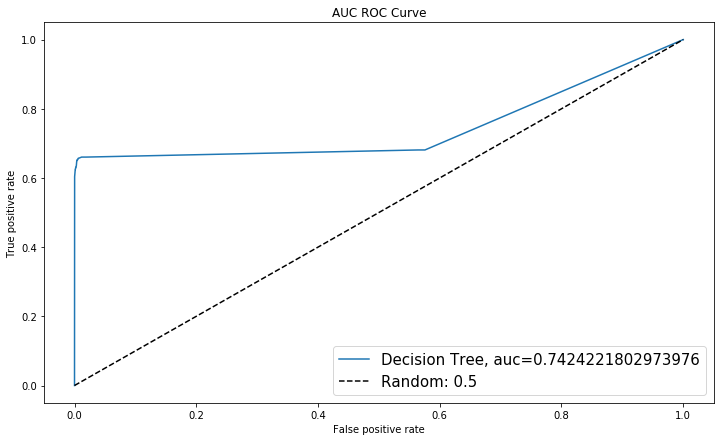

In [63]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_proba_pred)
auc = metrics.roc_auc_score(y_test, y_proba_pred)
plt.subplots(figsize=(12,7))
plt.plot(fpr,tpr,label="Decision Tree, auc="+str(auc))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('AUC ROC Curve')
plt.legend(loc=4,fontsize=15)
plt.show()

## X

### Record

In [64]:
# Predict X
y_pred = model.predict(X)
y_proba_pred = model.predict_proba(X)[:,1]

In [65]:
#confusion_matrix
from sklearn.metrics import confusion_matrix
df_confmat = pd.DataFrame(confusion_matrix(y, y_pred))
df_confmat.index.name = 'True'
df_confmat.columns.name = 'Predicted'
df_confmat

Predicted,0,1
True,,
0,7509069,150
1,1746,2620


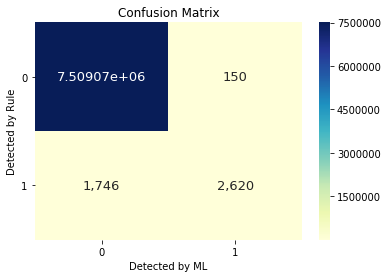

In [66]:
conf_mat= pd.DataFrame(confusion_matrix(y, y_pred))
fig = plt.figure(figsize=(6,4))
ax = sns.heatmap(conf_mat, annot=True, fmt=',g',cmap='YlGnBu',cbar_kws={"shrink": 1},annot_kws={"size": 13})
plt.xlabel('Detected by ML')
plt.ylabel('Detected by Rule')
plt.title('Confusion Matrix')
ax.xaxis.set_ticklabels([0,1])
ax.yaxis.set_ticklabels([0,1],rotation=0)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [67]:
# ROC AUC Score
from sklearn.metrics import roc_auc_score
print ('AUC Score : %0.15f' %roc_auc_score(y,y_proba_pred))

AUC Score : 0.918940952409486


In [68]:
# Classification Report
from sklearn.metrics import classification_report
class_report = classification_report(y, y_pred, output_dict=True)
df_class_report = pd.DataFrame(class_report).transpose()
df_class_report

,precision,recall,f1-score,support
0,0.999768,0.999980,0.999874,7.509219e+06
1,0.945848,0.600092,0.734305,4.366000e+03
accuracy,0.999748,0.999748,0.999748,9.997477e-01
macro avg,0.972808,0.800036,0.867089,7.513585e+06
weighted avg,0.999736,0.999748,0.999719,7.513585e+06


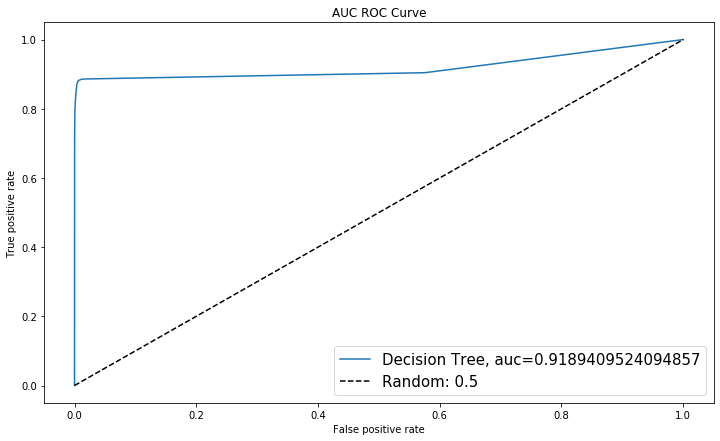

In [69]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y,  y_proba_pred)
auc = metrics.roc_auc_score(y, y_proba_pred)
plt.subplots(figsize=(12,7))
plt.plot(fpr,tpr,label="Decision Tree, auc="+str(auc))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('AUC ROC Curve')
plt.legend(loc=4,fontsize=15)
plt.show()

### MSISDN

In [29]:
df_result = pd.concat([df.reset_index(drop=True),pd.Series(y_pred).reset_index(drop=True)],axis='columns')

In [30]:
df_result = df_result.rename(columns={0:'prediction'})

In [31]:
df_result_uniq = df_result[['phoneNumber','label','prediction']].groupby('phoneNumber',as_index=False).aggregate({'label':max,'prediction':max})

In [32]:
y = df_result_uniq['label']
y_pred = df_result_uniq['prediction']

In [33]:
#confusion_matrix
from sklearn.metrics import confusion_matrix
df_confmat = pd.DataFrame(confusion_matrix(y,y_pred ))
df_confmat.index.name = 'Confirmed'
df_confmat.columns.name = 'Predicted'
df_confmat

Predicted,0,1
Confirmed,,
0,1850976,75
1,11,32


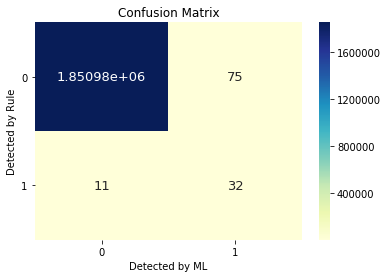

In [34]:
conf_mat= pd.DataFrame(confusion_matrix(y, y_pred))
fig = plt.figure(figsize=(6,4))
ax = sns.heatmap(conf_mat, annot=True, fmt=',g',cmap='YlGnBu',cbar_kws={"shrink": 1},annot_kws={"size": 13})
plt.xlabel('Detected by ML')
plt.ylabel('Detected by Rule')
plt.title('Confusion Matrix')
ax.xaxis.set_ticklabels([0,1])
ax.yaxis.set_ticklabels([0,1],rotation=0)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [35]:
# Classification Report
from sklearn.metrics import classification_report
class_report = classification_report(y, y_pred, output_dict=True)
df_class_report = pd.DataFrame(class_report).transpose()
df_class_report

,precision,recall,f1-score,support
0,0.999994,0.999959,0.999977,1.851051e+06
1,0.299065,0.744186,0.426667,4.300000e+01
accuracy,0.999954,0.999954,0.999954,9.999535e-01
macro avg,0.649530,0.872073,0.713322,1.851094e+06
weighted avg,0.999978,0.999954,0.999963,1.851094e+06


## train

In [42]:
# Predict X_test
y_pred = model.predict(X_train)
y_proba_pred = model.predict_proba(X_train)[:,1]

In [43]:
#confusion_matrix
from sklearn.metrics import confusion_matrix
df_confmat = pd.DataFrame(confusion_matrix(y_train, y_pred))
df_confmat.index.name = 'True'
df_confmat.columns.name = 'Predicted'
df_confmat

Predicted,0,1
True,,
0,2541,515
1,82,2974


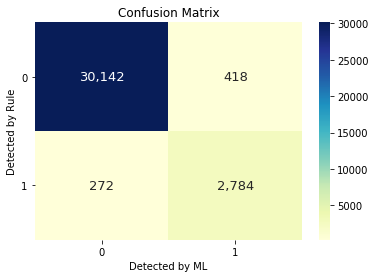

In [99]:
conf_mat= pd.DataFrame(confusion_matrix(y_train, y_pred))
fig = plt.figure(figsize=(6,4))
ax = sns.heatmap(conf_mat, annot=True, fmt=',g',cmap='YlGnBu',cbar_kws={"shrink": 1},annot_kws={"size": 13})
plt.xlabel('Detected by ML')
plt.ylabel('Detected by Rule')
plt.title('Confusion Matrix')
ax.xaxis.set_ticklabels([0,1])
ax.yaxis.set_ticklabels([0,1],rotation=0)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [100]:
# ROC AUC Score
from sklearn.metrics import roc_auc_score
print ('AUC Score : %0.15f' %roc_auc_score(y_train,y_proba_pred))

AUC Score : 0.986542775477303


In [101]:
# Classification Report
from sklearn.metrics import classification_report
class_report = classification_report(y_train, y_pred, output_dict=True)
df_class_report = pd.DataFrame(class_report).transpose()
df_class_report

,precision,recall,f1-score,support
0,0.991057,0.986322,0.988684,30560.000000
1,0.869457,0.910995,0.889741,3056.000000
accuracy,0.979474,0.979474,0.979474,0.979474
macro avg,0.930257,0.948658,0.939212,33616.000000
weighted avg,0.980002,0.979474,0.979689,33616.000000
